In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/eeg-brainwave-dataset-mental-state/mental-state.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('../input/eeg-brainwave-dataset-mental-state/mental-state.csv')

In [4]:
data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.008537,0.008941,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536,0.0
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.003324,0.003593,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973,2.0
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000754,0.000508,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079,2.0
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.003332,0.003557,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229,2.0


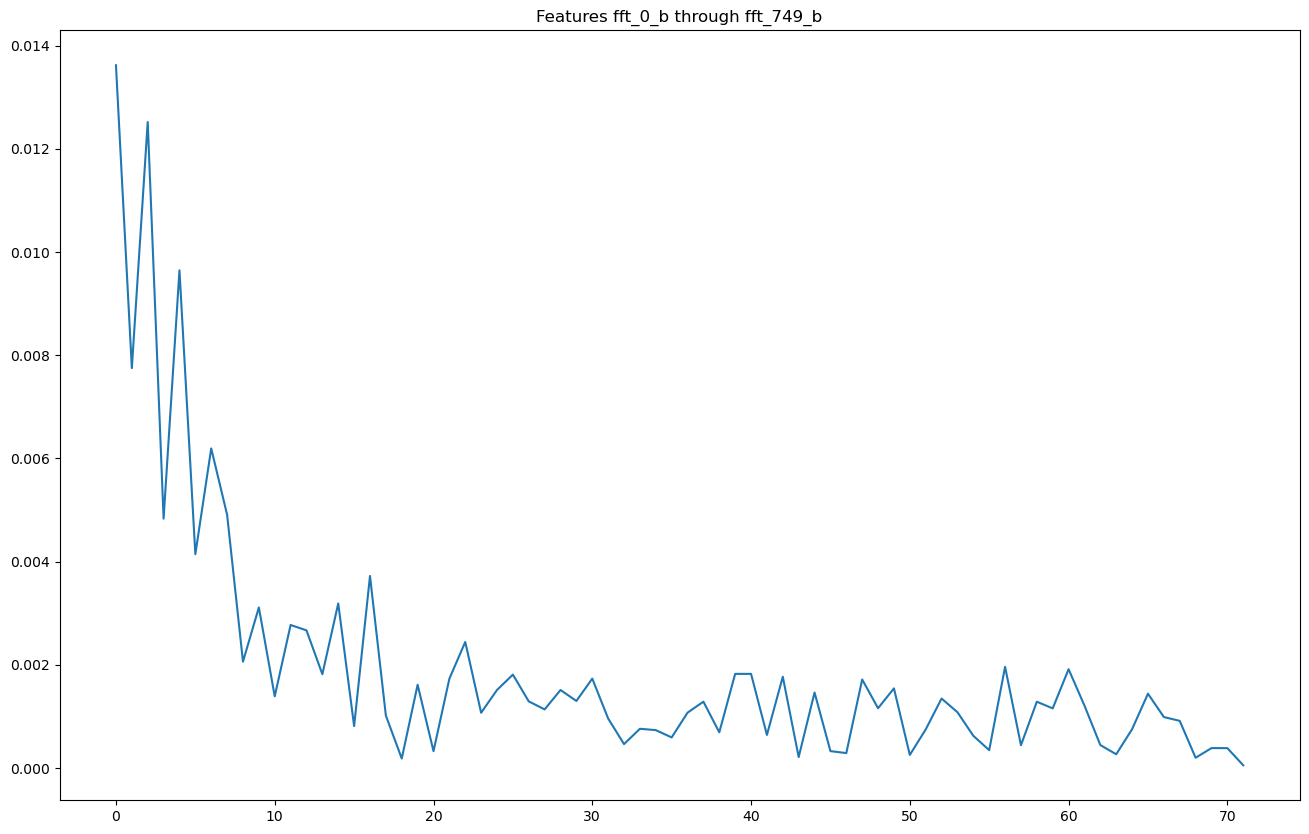

In [5]:
sample = data.loc[0, 'freq_010_0':'freq_750_0']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)

plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [6]:
data['Label'].value_counts()

2.0    830
1.0    830
0.0    819
Name: Label, dtype: int64

In [7]:
label_mapping = {'0.0': 0, '1.0': 1, '2.0': 2}

In [8]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['Label'] = df['Label'].replace(label_mapping)
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [10]:
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
1228,18.875113,109.092691,27.225469,21.305082,6.964365,-15.954065,1.519151,7.142496,9.836726,183.310949,...,0.001374,0.000885,0.001759,0.001849,0.003055,0.002243,0.001344,0.002476,0.001072,0.001993
1786,25.259023,33.327125,65.202727,20.902660,-5.224164,-1.682917,52.831583,3.791199,25.982024,33.077807,...,0.001785,0.000964,0.000331,0.000338,0.000653,0.001732,0.001741,0.001418,0.001131,0.000422
209,23.839953,-4.259078,-229.188941,18.785473,-2.485715,-134.148117,-218.643345,-4.466033,24.421032,122.103492,...,0.002227,0.000935,0.000849,0.002228,0.001262,0.000914,0.000905,0.000195,0.002664,0.000521
559,22.575363,25.228504,28.747578,15.377023,-0.500223,1.523311,-1.672705,0.148657,23.646387,25.656641,...,0.010222,0.008971,0.006954,0.006803,0.004954,0.004878,0.015575,0.008294,0.006240,0.005078
1984,40.058117,31.555164,-21.034246,34.946457,-23.371946,-1.930462,-148.455850,-22.091629,75.446352,31.389344,...,0.000105,0.000074,0.000048,0.000055,0.001028,0.000603,0.000446,0.000728,0.000142,0.000411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,21.083816,19.895563,18.968566,20.132062,8.458956,-6.960552,8.420081,13.663810,-20.390547,26.949771,...,0.024027,0.007333,0.014824,0.014703,0.011312,0.017288,0.011776,0.018456,0.004682,0.019357
2154,23.998289,29.361734,25.037762,-4.255297,-1.227794,1.397922,-9.106748,14.402332,26.220914,26.643806,...,0.002983,0.013251,0.012160,0.012330,0.009878,0.012761,0.019145,0.016046,0.007885,0.008731
1766,17.866137,20.019543,30.679723,12.689574,-1.507275,8.348476,-0.025243,-1.803082,23.460320,0.128398,...,0.013355,0.004366,0.007712,0.004192,0.009036,0.010538,0.005273,0.004098,0.002880,0.010289
1122,27.477242,24.162312,18.798824,21.366125,-4.486187,1.581129,4.359819,-4.935022,30.235438,22.084650,...,0.020998,0.009106,0.005606,0.006176,0.012413,0.005869,0.010038,0.009971,0.007039,0.008478


#Modeling

In [11]:
inputs = tf.keras.Input(shape=(X_train.shape))


In [12]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)


outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 988)]             0         
                                                                 
 dense (Dense)               (None, 64)                63296     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 63,491
Trainable params: 63,491
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
44/44 [==============================] - 1s 9ms/step - loss: 716.8414 - accuracy: 0.5072 - val_loss: 30.2288 - val_accuracy: 0.7867
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 64.0592 - accuracy: 0.8091 - val_loss: 171.5486 - val_accuracy: 0.6542
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 54.2076 - accuracy: 0.8141 - val_loss: 25.9073 - val_accuracy: 0.8761
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 44.8009 - accuracy: 0.8516 - val_loss: 24.4104 - val_accuracy: 0.8588
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 26.1673 - accuracy: 0.9042 - val_loss: 63.0621 - val_accuracy: 0.7752
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 17.9681 - accuracy: 0.8610 - val_loss: 69.7745 - val_accuracy: 0.7378
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 37.0800 - accuracy: 0.8573 - val_loss: 37.8604 - val_accuracy: 0.8934
Epoc

In [14]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 86.156%


In [15]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

24/24 [==============================] - 0s 1ms/step


In [16]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))



24/24 [==============================] - 0s 2ms/step


24/24 [==============================] - 0s 1ms/step


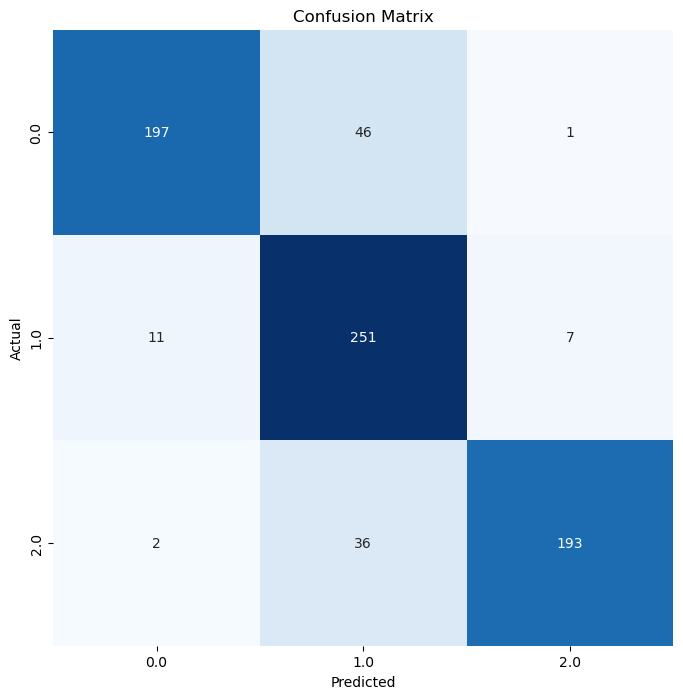

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       244
         1.0       0.75      0.93      0.83       269
         2.0       0.96      0.84      0.89       231

    accuracy                           0.86       744
   macro avg       0.88      0.86      0.87       744
weighted avg       0.88      0.86      0.86       744



In [17]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)